# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [3]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [5]:
x_train[0].shape

(28, 28)

Check the sample train data

In [6]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [7]:

y_train[333]

8

In [8]:
#check the actual image

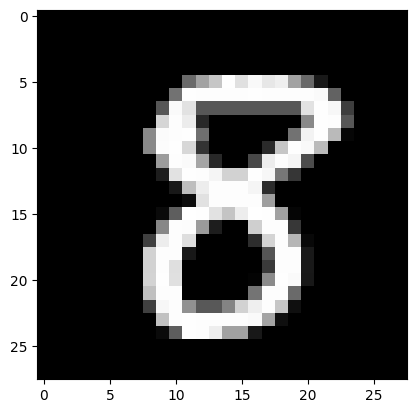

In [9]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [10]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [11]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [12]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [13]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [15]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.5154 - accuracy: 0.8463 - val_loss: 0.2057 - val_accuracy: 0.9384
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2447 - accuracy: 0.9285 - val_loss: 0.1436 - val_accuracy: 0.9578
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1940 - accuracy: 0.9423 - val_loss: 0.1269 - val_accuracy: 0.9622
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1665 - accuracy: 0.9505 - val_loss: 0.1072 - val_accuracy: 0.9677
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1522 - accuracy: 0.9549 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1392 - accuracy: 0.9586 - val_loss: 0.1044 - val_accuracy: 0.9696
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1303 - accuracy: 0.9608 - val_loss: 0.0958 - val_accuracy: 0.9726
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [16]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10248085856437683
Test accuracy: 0.9764000177383423


> This result shows that the test loss of 0.1003 which means that the model is making relatively small errors on the test data. The test accuracy of 0.9775 shows that the model is correctly classifying nearly all of the instances in the test data.

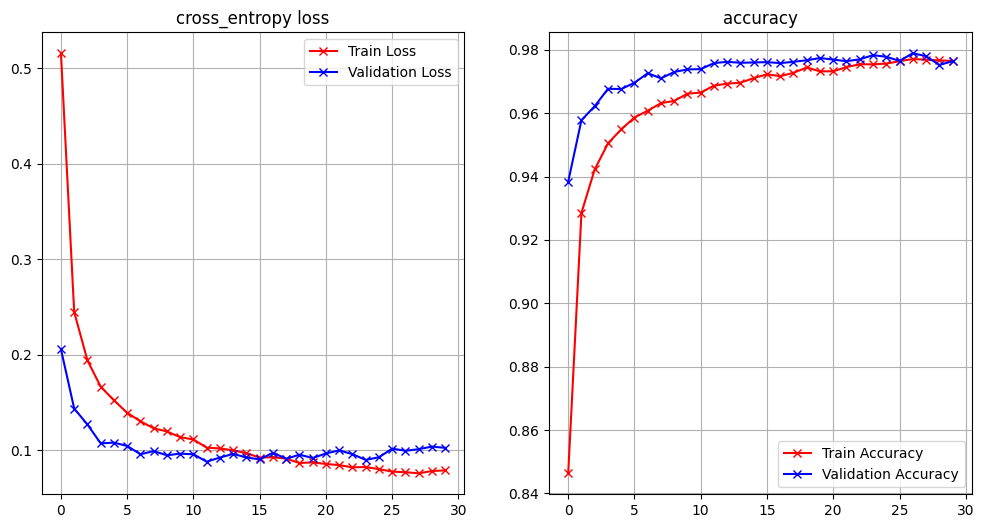

In [17]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

> the fact that both the training and validation loss are decreasing suggests that the model is learning effectively and generalizing well to unseen data. Moreover, The training and validation accuracy are increasing suggests that the model is learning to make accurate predictions. However, the gap between the training and validation accuracy indicates that there is some risk of overfitting.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train[0].shape

(28, 28)

In [39]:
#Reshaping and normalizing the data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0

In [40]:
# Convert labels to one-hot encoded format
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
val_split = 0.1
val_size = int(val_split * x_train.shape[0])

x_val = x_train[-val_size:]
y_val = y_train[-val_size:]
x_train = x_train[:-val_size]
y_train = y_train[:-val_size]

In [42]:
# 2. First hidden layer of size 400 and second of size 300
model_1 = Sequential([
    Dense(400, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.4), # 3. Dropout of .4 at each layer
    Dense(300, activation='relu'),
    Dropout(0.4), # 3. Dropout of .4 at each layer
    Dense(10, activation='softmax')
])

In [43]:
model_1.compile(optimizer=RMSprop(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_data=(x_val, y_val))

Epoch 1/20
422/422 [==============================] - 6s 13ms/step - loss: 0.3483 - accuracy: 0.8918 - val_loss: 0.1065 - val_accuracy: 0.9682
Epoch 2/20
422/422 [==============================] - 6s 15ms/step - loss: 0.1577 - accuracy: 0.9521 - val_loss: 0.0835 - val_accuracy: 0.9750
Epoch 3/20
422/422 [==============================] - 5s 13ms/step - loss: 0.1227 - accuracy: 0.9631 - val_loss: 0.0793 - val_accuracy: 0.9775
Epoch 4/20
422/422 [==============================] - 9s 22ms/step - loss: 0.1049 - accuracy: 0.9691 - val_loss: 0.0669 - val_accuracy: 0.9815
Epoch 5/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0902 - accuracy: 0.9730 - val_loss: 0.0695 - val_accuracy: 0.9818
Epoch 6/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0633 - val_accuracy: 0.9832
Epoch 7/20
422/422 [==============================] - 5s 13ms/step - loss: 0.0732 - accuracy: 0.9781 - val_loss: 0.0643 - val_accuracy: 0.9823

In [44]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               120300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- How many parameters does your model have?  How does it compare with the previous model?

> The previous model has a parameter of 55050 and this model has a parameter of 437310 which is a big jump from what we've got from the previous model.

In [45]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08381947129964828
Test accuracy: 0.9829000234603882


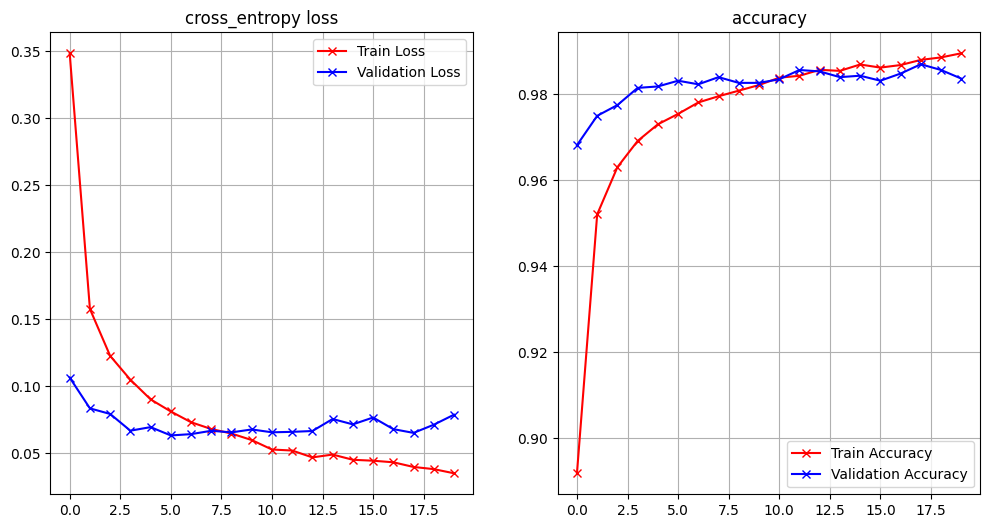

In [46]:
def plot_loss_accuracy(history_1):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_1)

In [54]:
# Model 2 with regularization
from keras import regularizers
model_2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

- Train this model for your preferred epochs, learning rate, batch size and optimizer

In [55]:
# Compile model
model_2.compile(optimizer=RMSprop(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                        batch_size=256,
                        epochs=30,
                        validation_data=(x_val, y_val))

Epoch 1/30
211/211 [==============================] - 2s 7ms/step - loss: 1.6856 - accuracy: 0.6964 - val_loss: 0.7441 - val_accuracy: 0.9200
Epoch 2/30
211/211 [==============================] - 1s 6ms/step - loss: 0.8850 - accuracy: 0.8410 - val_loss: 0.5657 - val_accuracy: 0.9247
Epoch 3/30
211/211 [==============================] - 1s 7ms/step - loss: 0.7515 - accuracy: 0.8593 - val_loss: 0.4897 - val_accuracy: 0.9327
Epoch 4/30
211/211 [==============================] - 1s 5ms/step - loss: 0.6916 - accuracy: 0.8685 - val_loss: 0.4615 - val_accuracy: 0.9342
Epoch 5/30
211/211 [==============================] - 1s 6ms/step - loss: 0.6578 - accuracy: 0.8730 - val_loss: 0.4337 - val_accuracy: 0.9395
Epoch 6/30
211/211 [==============================] - 2s 8ms/step - loss: 0.6299 - accuracy: 0.8775 - val_loss: 0.4141 - val_accuracy: 0.9388
Epoch 7/30
211/211 [==============================] - 2s 8ms/step - loss: 0.6039 - accuracy: 0.8834 - val_loss: 0.3949 - val_accuracy: 0.9405
Epoch 

In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many parameters does your model have?  How does it compare with the previous model?

> Strangely, this model has the same parameter as from the previous model created which is 437310.

In [57]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31225380301475525
Test accuracy: 0.9491999745368958


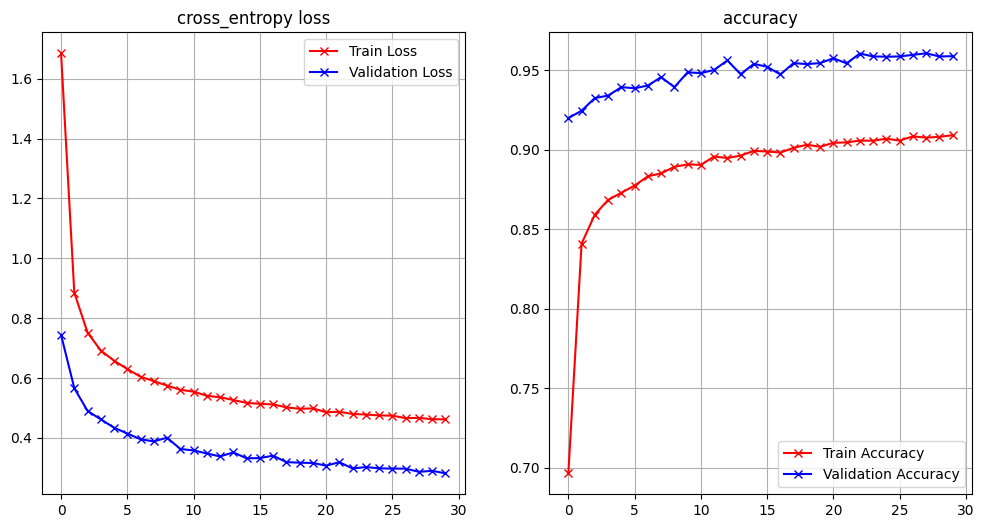

In [58]:
def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_2)

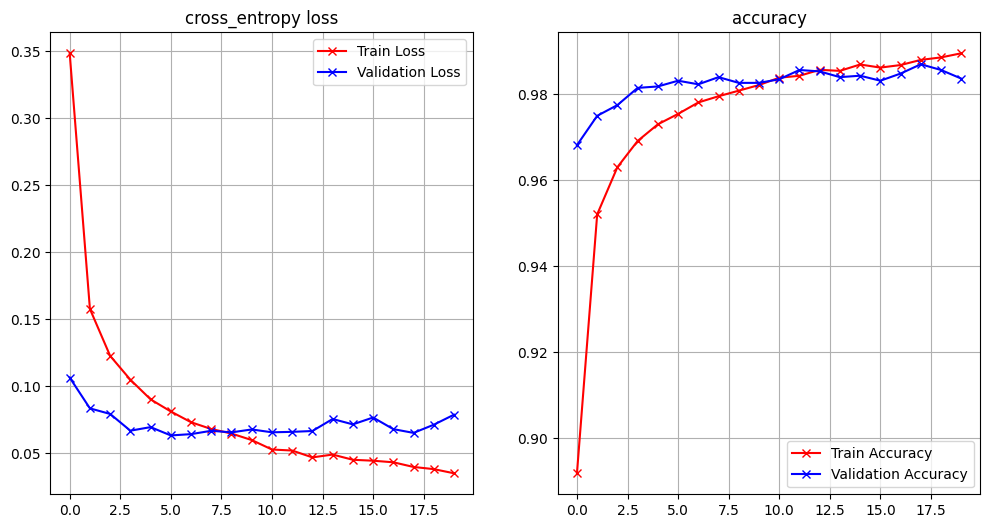

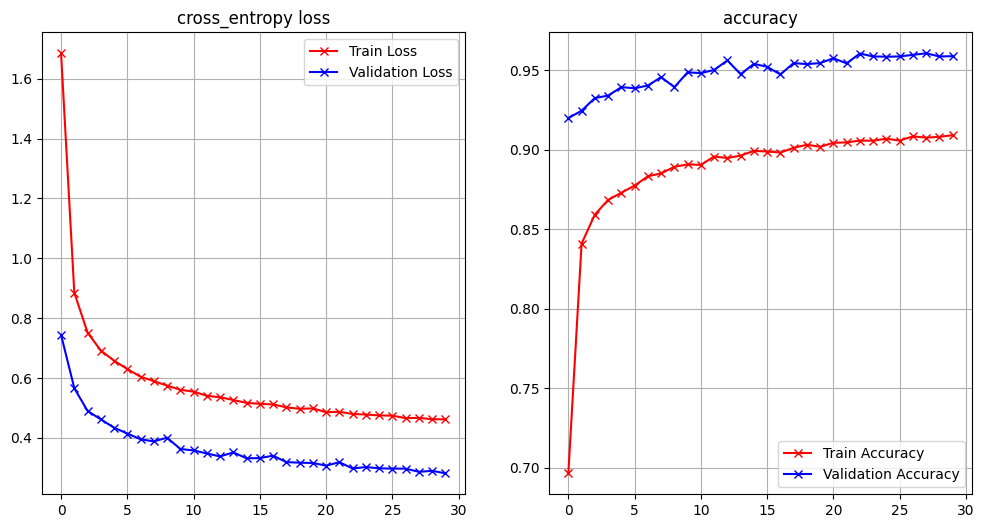

In [59]:
def plot_loss_accuracy(history_1):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_1.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_1.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_1.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_1.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_1)

def plot_loss_accuracy(history_2):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_2.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_2.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_2.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_2.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history_2)

- Compare the accuracy and loss (training and validation) of model_1 and model_2

> Both models' training loss consistently decrease throughout training. However, Model 1's training loss starts lower and reaches a lower minimum value compared to Model 2. Similarly, Model 1's validation loss is consistently lower than Model 2's throughout training. When talking about the accuracy, both models' training accuracy reach close to 100%. However, Model 1's training accuracy increases faster and achieves a slightly higher maximum accuracy than Model 2. Model 1's validation accuracy is also consistently higher than Model 2's validation accuracy throughout training.

#Conclusion


> In conclusion, this hands on activity provided us an experience in building, training, and evaluating neural network models for image classification tasks using Keras. We gained insights into various aspects of deep learning model development, including architecture design, data preprocessing, regularization techniques, training strategies, and performance evaluation. These concepts are fundamental for understanding and applying neural networks in real-world applications.

In [105]:
!jupyter-nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.3 Regularization (Figueroa).ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.3 Regularization (Figueroa).ipynb to html
[NbConvertApp] Writing 1053400 bytes to /content/drive/MyDrive/Colab Notebooks/Hands-on Activity 1.3 Regularization (Figueroa).html


Colab Link: (https://colab.research.google.com/drive/1LqGHygf8cqYeqfv0trasxnlf68h02uLm?usp=sharing)

>